In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_selection import mutual_info_classif

#### Did you know you can just load data from a URL?

In [93]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### In this doc, I just sort of go through a few useful metrics from information theory and show how to use them as opposed to going through the theory behind them. So lots of "information", "theory" not quite so much.

### 10.1 Feature selection using entropy

#### Often, we start off data analysis with what's known as feature selection. Feature selection can be done objectively (in a way) by using entropy measurements. If a feature (e.g. survival) has a low entropy content that means it doesn't vary all that much, and thus it might have a low entropy content. If it has a high entropy content, it may be too noisy and might just not have enough predictive power
#### in physics entropy $S = k_B \ln{\Omega} = -k_B \ln{p}$.

In [81]:
def calculate_entropy(X):
    '''our entropy function.'''
    _, counts = np.unique(X, return_counts=True)
    p = counts/sum(counts)
    s = -np.sum(p*np.log2(p))
    return s

In [82]:
calculate_entropy(df['Survived'])

0.9607079018756469

In [83]:
calculate_entropy(df['Parch'])

1.1283373786812922

#### Just from this quick analysis, it looks like the survival rate has a bit more predictive power than the data on parent/children ratio

### 10.2 Similary using mutual information score

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


C:\Users\ajati\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\ajati\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


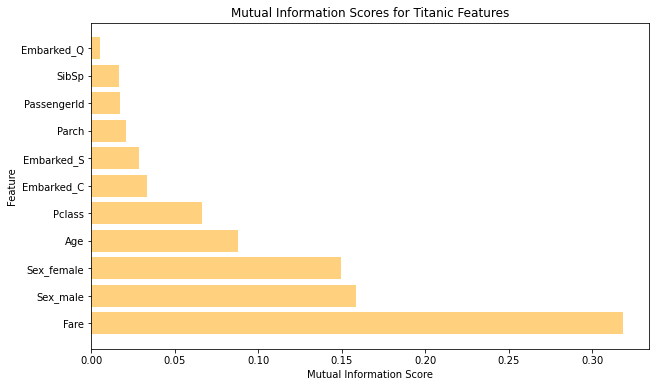

In [104]:
df = pd.read_csv(url)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1) #drop these columns
df = pd.get_dummies(df, columns=['Sex', 'Embarked']) #one-hot encoding. Else, not sure how to use the data!

df.dropna(inplace=True) #drop rows with missing values.

X = df.drop('Survived', axis=1) #remove target from features, X
Y = df['Survived'] #this is our target. 

print(X.columns)
mi_scores = mutual_info_classif(X, Y, discrete_features=[1, 2, 3, 4, 5, 6])
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='orange', alpha = .5)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores for Titanic Features')
plt.show()

#### This analysis shows that "fare", for instance, is a prediction "survival" predictor than "Parch" is, for instance

### 10.3 KL Divergence and Cross Entropy

#### You can argue that this discussion would be incomplete without KL (Kullback-Leibler divergence). KL divergence (often referred to as relative entropy) measures the distance between probability distributions. 

#### Cross Entropy is similar in some regards. Often, Cross Entropy is also used to compare model $Q(x)$ (theory) to data (observations) $P(x)$, and is used as a loss function meant to be minimized for best model parameters.

#### From wikipedia, ${\displaystyle D_{\text{KL}}(P\parallel Q)=\sum _{x\in {\mathcal {X}}}P(x)\log \left({\frac {P(x)}{Q(x)}}\right)}$
#### Also wikipedia, ${\displaystyle CE(P,Q)=-\sum _{x\in {\mathcal {X}}}P(x)\,\log Q(x)}$

In [121]:
def measure_KL(p, q):
    p, q = np.array(p), np.array(q)
    return np.sum(p*np.log(p/q))

def measure_CE(p, q):
    p, q = np.array(p), np.array(q)
    return -np.sum(p*(np.log(q)))

print(df)

ms = df[df['Sex']=='male']['Survived']
fs = df[df['Sex']=='female']['Survived']

ms_prob = np.bincount(male_survived)/len(male_survived) #survival probability
fs_prob = np.bincount(female_survived)/len(female_survived)

kl_divergence = entropy(male_survival_distribution, female_survival_distribution)

print('KL divergence: {}'.format(measure_KL(ms_prob, fs_prob)))
print('Cross Entropy: {}'.format(measure_CE(ms_prob, fs_prob)))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### 10.4 Anomaly detection through Entropy 

#### High entropy is manifested by high variability, which can often be caused by outliers/anomalies. So let's use entropy to our advantage, i.e. to detect anomalous values.

Age entropy: 5.836583634094744
Anomaly Detection Threshold: 4.669266907275795


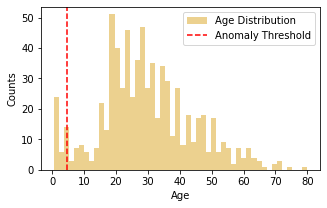

In [137]:
df = pd.read_csv(url)
df.dropna(subset=['Age'], inplace=True)
s_age = calculate_entropy(df['Age'])
print("Age entropy:", s_age)

anomaly_threshold = .8*s_age

print("Anomaly Detection Threshold:", anomaly_threshold)
anomalies = df[df['Age'].apply(lambda age: calculate_entropy(np.array([age, 100-age]))) > anomaly_threshold] #not a very
    #good way of doing it. 100-age is the complement, here

plt.figure(figsize=(5, 3))
plt.hist(df['Age'], bins=50, alpha=0.5, color = 'goldenrod', label='Age Distribution')
plt.axvline(x=anomaly_threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Counts');

#### It is a bit of a primitive method, but it can get the job done, fast.